In [1]:
pip install -i https://test.pypi.org/simple/ climateservaccess==0.0.4

Looking in indexes: https://test.pypi.org/simple/
  Attempting uninstall: climateservaccess
    Found existing installation: climateservaccess 0.0.3
    Uninstalling climateservaccess-0.0.3:
      Successfully uninstalled climateservaccess-0.0.3
Note: you may need to restart the kernel to use updated packages.


REQUEST SUBMITTED: NASA_IMERG_Late [26], 01/01/2023 to 01/30/2023, average
ID: 7a684636-9fa2-4449-a280-7ed5f3b5b82d
32.8%
100.0%
Data retrieved successfully.


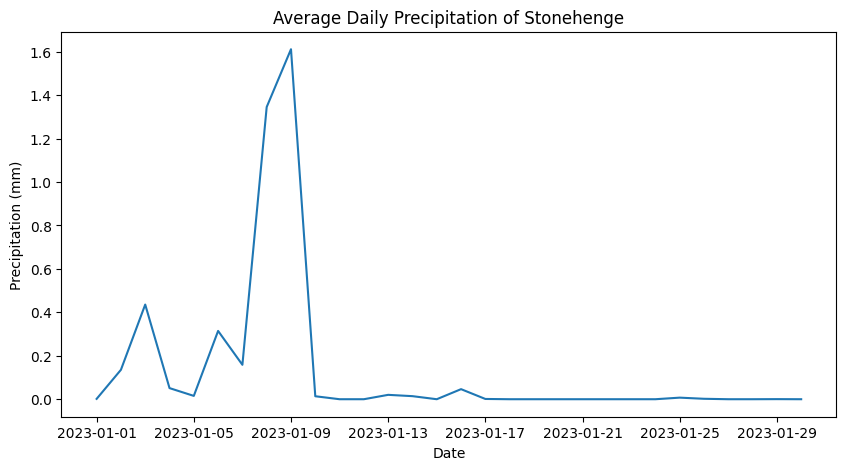

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import climateservaccess as ca

# Define parameters
data_type = 26 # see ca.datatypeDict for data types
start_date = '01/01/2023' 
end_date = '01/30/2023'
operation_type = 'average' # valid options are: 'average', 'max', 'min'
lat = 51.17912455395276 # latitude of Stonehenge
lon = -1.8262705029300066 # longitude of Stonehenge
res = 0.01 # resolution in degrees
polygon = ca.getBox(lat, lon, res) # defines box of width res around lat, lon

# Get dataframe with data from ClimateSERV
df = ca.getDataFrame(data_type, start_date, end_date, operation_type, polygon)

# Select data from df and store inside data_df
data_df = pd.DataFrame(df['data'].to_list())
# Convert the date column to datetime format
data_df['date'] = pd.to_datetime(data_df['date'])

# Plot the data
plt.figure(figsize=(10,5))
plt.plot(data_df['date'], data_df['raw_value'])
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Average Daily Precipitation of Stonehenge')
plt.show()

In [ ]:
## Get time intervals (in days) for each datatype and each interval type (0, 1, 2) ##
## SPOILER ALERT: Each interval type produces the exact same time interval ##

import pandas as pd
import matplotlib.pyplot as plt
from climateservaccess import getClimateservData, getBox, datatypeDict

# Define some parameters
start_date = '01/01/2016'
end_date = '01/30/2016'
LIS_res = 1
REGION = 'gambia'
gambia_box = [[-16.85, 13.85], [-16.85, 13.05], [-13.78, 13.05], [-13.78, 13.85], [-16.85, 13.85]]

with open(f'../test/interval_type_ref.csv', 'w') as f:

      f.write("datatype,0,1,2\n")
      for key, value in datatypeDict.items():
            
            outstring = f"{key},"
            for interval_type in range(3):

                  df = getClimateservData(key, start_date, end_date, 'Average', getBox(lat=well['Latitude'], lon=well['Longitude'], res=LIS_res))

                  # Select data from df
                  temp_data = pd.DataFrame(df['data'].to_list())

                  if temp_data.empty:
                        outstring += f"NA,"
                        continue

                  # Calculate average time intervals in days between data points
                  temp_data['date'] = pd.to_datetime(temp_data['date'])
                  time_intervals = (temp_data['date'] - temp_data['date'].shift()).mean()
                  print(time_intervals.days)

                  outstring += f"{time_intervals.days},"
            outstring = outstring[:-1] + "\n"
            f.write(outstring)
